# **TUGAS BESAR VISI KOMPUTER - KLASIFIKASI KEMATANGAN PISANG DENGAN CNN**
M Ivan Irsanto


1301200467


IF4408

# **PART 1 - MEMBUAT DAN MENYIMPAN MODEL .h5**

# **Importing Libraries**

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Training set Image Processing**

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/banana-ripeness/training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 330 files belonging to 3 classes.


# **Validation set Image Processing**

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/banana-ripeness/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70 files belonging to 3 classes.


# **Building CNN Model**

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(3, activation='softmax')
])

# **Compile and Train Model**

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 62, 62, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 128)       5

In [20]:
training_history1 = model.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
11/11 [==============================] - 21s 573ms/step - loss: 0.0587 - accuracy: 0.9848 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 2/5
11/11 [==============================] - 23s 728ms/step - loss: 0.0928 - accuracy: 0.9606 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 3/5
11/11 [==============================] - 19s 524ms/step - loss: 0.0780 - accuracy: 0.9788 - val_loss: 0.0207 - val_accuracy: 0.9857
Epoch 4/5
11/11 [==============================] - 28s 1s/step - loss: 0.0317 - accuracy: 0.9879 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 5/5
11/11 [==============================] - 22s 637ms/step - loss: 0.0640 - accuracy: 0.9758 - val_loss: 0.0607 - val_accuracy: 0.9857


In [8]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
11/11 [==============================] - 127s 3s/step - loss: 1.3693 - accuracy: 0.5606 - val_loss: 68.6089 - val_accuracy: 0.2000
Epoch 2/15
11/11 [==============================] - 21s 684ms/step - loss: 0.9971 - accuracy: 0.6758 - val_loss: 14.5340 - val_accuracy: 0.3143
Epoch 3/15
11/11 [==============================] - 20s 611ms/step - loss: 0.6007 - accuracy: 0.7758 - val_loss: 2.1887 - val_accuracy: 0.6000
Epoch 4/15
11/11 [==============================] - 20s 512ms/step - loss: 0.5176 - accuracy: 0.8455 - val_loss: 5.6287 - val_accuracy: 0.4857
Epoch 5/15
11/11 [==============================] - 22s 730ms/step - loss: 0.3450 - accuracy: 0.8939 - val_loss: 4.8900 - val_accuracy: 0.4857
Epoch 6/15
11/11 [==============================] - 22s 705ms/step - loss: 0.2406 - accuracy: 0.9182 - val_loss: 1.5423 - val_accuracy: 0.5714
Epoch 7/15
11/11 [==============================] - 20s 525ms/step - loss: 0.2303 - accuracy: 0.9303 - val_loss: 1.7467 - val_accuracy: 0.7286

In [21]:
training_history2 = model.fit(x=training_set,validation_data=validation_set,epochs=25)

Epoch 1/25
11/11 [==============================] - 21s 547ms/step - loss: 0.0252 - accuracy: 0.9909 - val_loss: 0.2119 - val_accuracy: 0.9429
Epoch 2/25
11/11 [==============================] - 24s 847ms/step - loss: 0.0343 - accuracy: 0.9848 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 3/25
11/11 [==============================] - 21s 555ms/step - loss: 0.0214 - accuracy: 0.9909 - val_loss: 0.0449 - val_accuracy: 0.9714
Epoch 4/25
11/11 [==============================] - 23s 740ms/step - loss: 0.0470 - accuracy: 0.9879 - val_loss: 0.0342 - val_accuracy: 0.9714
Epoch 5/25
11/11 [==============================] - 23s 731ms/step - loss: 0.0233 - accuracy: 0.9879 - val_loss: 0.0318 - val_accuracy: 0.9857
Epoch 6/25
11/11 [==============================] - 22s 658ms/step - loss: 0.0678 - accuracy: 0.9606 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 7/25
11/11 [==============================] - 21s 561ms/step - loss: 0.0574 - accuracy: 0.9848 - val_loss: 0.0090 - val_accuracy: 1.0000

In [22]:
training_history3 = model.fit(x=training_set,validation_data=validation_set,epochs=35)

Epoch 1/35
11/11 [==============================] - 23s 784ms/step - loss: 0.0625 - accuracy: 0.9758 - val_loss: 0.0627 - val_accuracy: 0.9857
Epoch 2/35
11/11 [==============================] - 21s 561ms/step - loss: 0.0598 - accuracy: 0.9758 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 3/35
11/11 [==============================] - 21s 563ms/step - loss: 0.0340 - accuracy: 0.9909 - val_loss: 0.0403 - val_accuracy: 0.9714
Epoch 4/35
11/11 [==============================] - 23s 738ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.1022 - val_accuracy: 0.9571
Epoch 5/35
11/11 [==============================] - 21s 556ms/step - loss: 0.0365 - accuracy: 0.9909 - val_loss: 0.1153 - val_accuracy: 0.9429
Epoch 6/35
11/11 [==============================] - 26s 608ms/step - loss: 0.0236 - accuracy: 0.9909 - val_loss: 0.0814 - val_accuracy: 0.9714
Epoch 7/35
11/11 [==============================] - 23s 753ms/step - loss: 0.0132 - accuracy: 0.9939 - val_loss: 0.0163 - val_accuracy: 0.9857

In [23]:
training_history4 = model.fit(x=training_set,validation_data=validation_set,epochs=45)

Epoch 1/45
11/11 [==============================] - 20s 557ms/step - loss: 0.0337 - accuracy: 0.9879 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/45
11/11 [==============================] - 23s 793ms/step - loss: 0.0045 - accuracy: 0.9970 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/45
11/11 [==============================] - 21s 562ms/step - loss: 0.0210 - accuracy: 0.9909 - val_loss: 5.4685e-04 - val_accuracy: 1.0000
Epoch 4/45
11/11 [==============================] - 21s 555ms/step - loss: 0.0254 - accuracy: 0.9909 - val_loss: 0.1145 - val_accuracy: 0.9571
Epoch 5/45
11/11 [==============================] - 21s 567ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.7705 - val_accuracy: 0.8000
Epoch 6/45
11/11 [==============================] - 23s 739ms/step - loss: 0.0115 - accuracy: 0.9939 - val_loss: 0.3062 - val_accuracy: 0.9000
Epoch 7/45
11/11 [==============================] - 22s 668ms/step - loss: 0.0201 - accuracy: 0.9970 - val_loss: 0.0036 - val_accuracy: 1.

# **Evaluating Model**

In [9]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

11/11 [==============================] - 17s 214ms/step - loss: 0.0772 - accuracy: 0.9788
Training accuracy: 0.978787899017334


In [10]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

3/3 [==============================] - 3s 8ms/step - loss: 0.0616 - accuracy: 0.9714
Validation accuracy: 0.9714285731315613


# **Saving Model**

In [11]:
model.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

In [13]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [14]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# **Calculating Accuracy of Model Achieved on Validation set**

In [11]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 97.14285731315613 %


# **Accuracy Visualization**

**Training Model Accuracy**

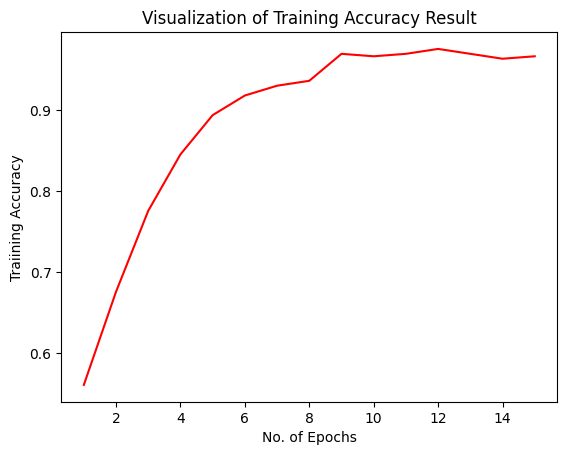

In [12]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

**Validation Model Accuracy**

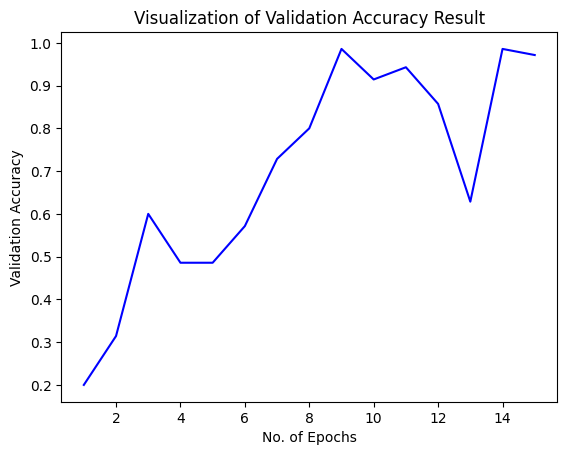

In [13]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

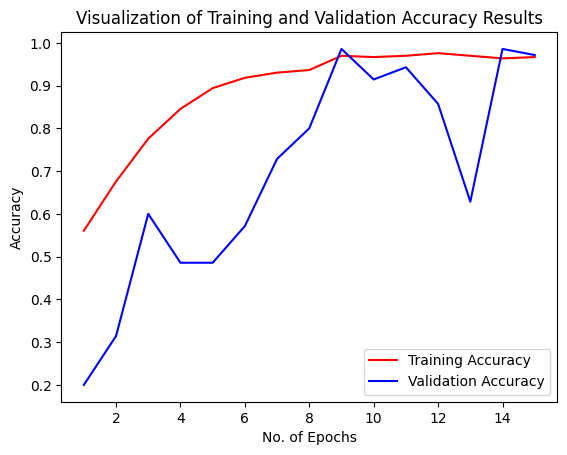

In [14]:
epochs = [i for i in range(1, 16)]

# Plotting Training Accuracy
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
# Plotting Validation Accuracy
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Training and Validation Accuracy Results')
plt.legend()  # Add legend to distinguish between Training and Validation Accuracy
plt.show()

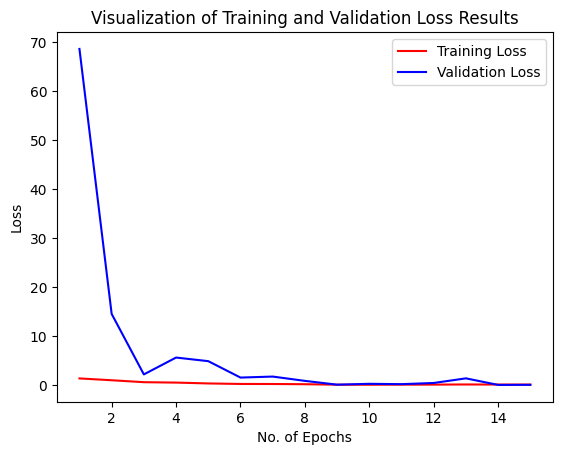

In [15]:
epochs = [i for i in range(1, 16)]

# Plotting Training Loss
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
# Plotting Validation Loss
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')

plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Visualization of Training and Validation Loss Results')
plt.legend()  # Add legend to distinguish between Training and Validation Loss
plt.show()

# **Test Set Evaluation**

In [16]:

test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/banana-ripeness/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70 files belonging to 3 classes.


In [17]:
test_loss,test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

3/3 [==============================] - 24s 8ms/step - loss: 0.0616 - accuracy: 0.9714
Test accuracy: 0.9714285731315613
